*Demonstração de análise de consumo com os atributos idade e renda na base de dados*

In [22]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize']=[15,10] 

In [23]:
#importando a base de dados e apresentando 10 deles
url = 'https://github.com/higoramario/univesp-com410-aprendizado-de-maquinas/raw/main/social-network-ads.csv'
compras = pd.read_csv(url,sep=',')
compras.head(10)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,27,58000,0
6,27,84000,0
7,32,150000,1
8,25,33000,0
9,35,65000,0


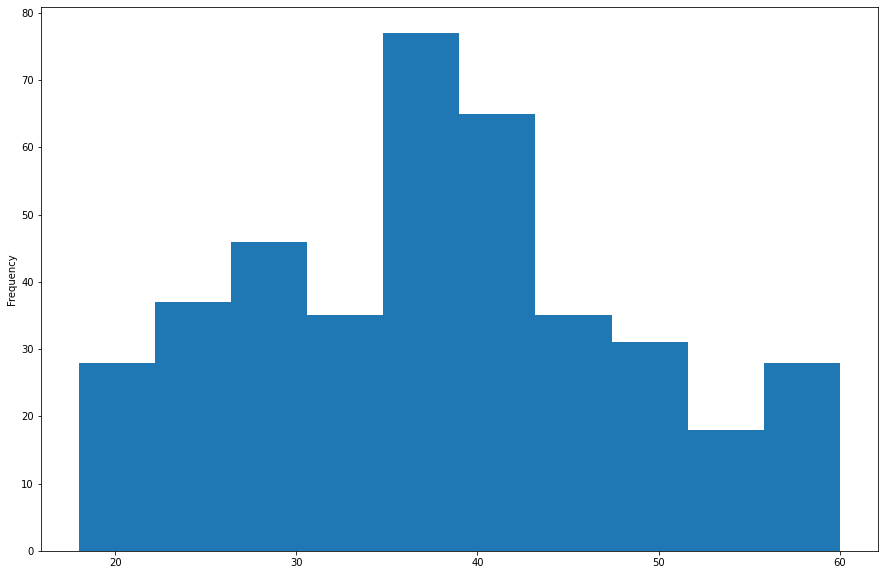

In [24]:
#conhecer a distribuição de idades
compras['Age'].plot.hist()
plt.show()

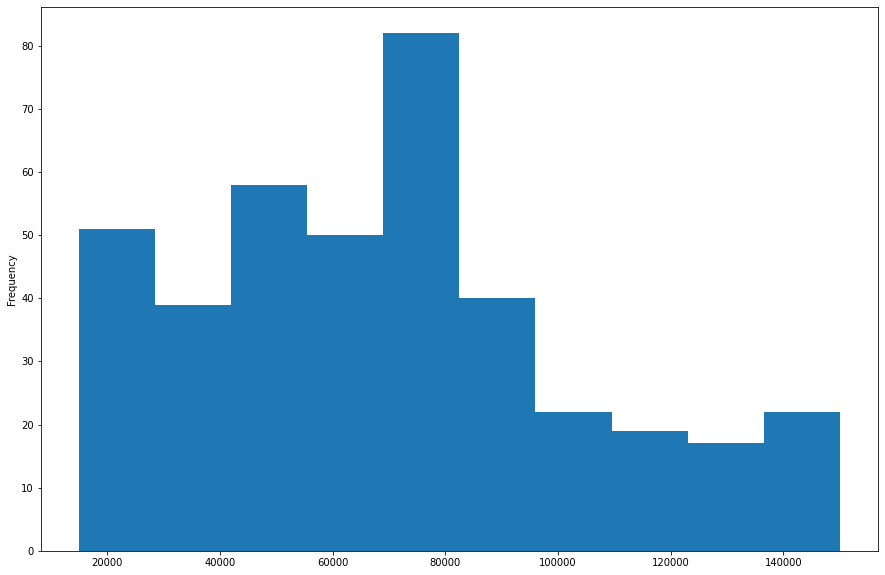

In [25]:
#conhecer a distribuição de salários
compras['EstimatedSalary'].plot.hist()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

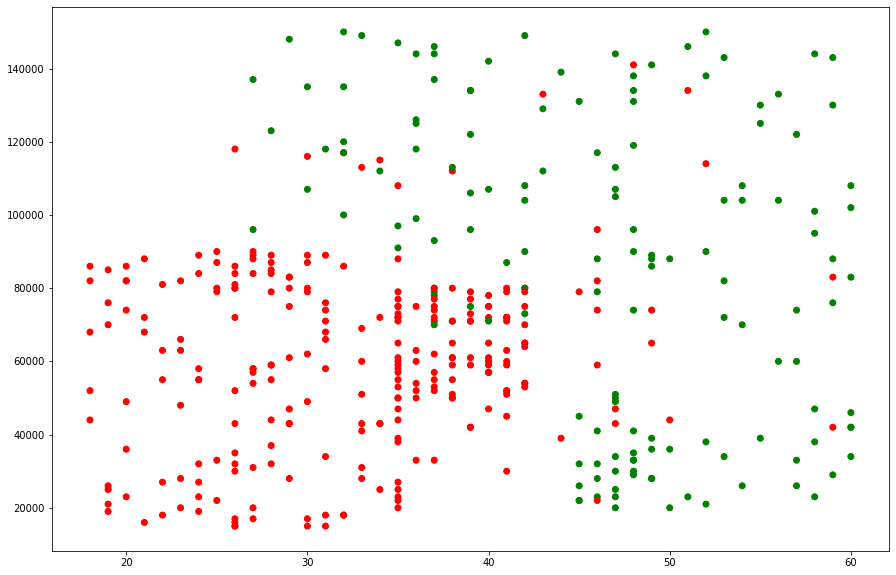

In [26]:
#Conhecendo a distribuição espacial doa dados
fig, ax = plt.subplots()
colors = {0:'red', 1:'green'}
ax.scatter(compras['Age'], compras['EstimatedSalary'], c=compras['Purchased'].map(colors))
plt.show

In [27]:
#dividir os dados em treinamento (90%) e teste (10%)
atributos = compras[['Age','EstimatedSalary']]
classes = compras['Purchased']
compras_treino, compras_teste, classes_treino, classes_teste = train_test_split(atributos, classes, test_size=0.1)

In [28]:
#diminuir a escala dos dados para acelerar a execução do treinamento do modelo e da geração do gráfico de visualização dos resultados
scaler = StandardScaler()
compras_treino = scaler.fit_transform(compras_treino)
compras_teste = scaler.transform(compras_teste)

In [39]:
#plotar o resultado para ver como o modelo classifica o conjunto de testes
#função que recebe os atributos e classes do conjunto de testes, o classificador SVM e plota os resultados
def visualizarSVM(atributos_t,classes_t,classificador):
    atributos, classes = atributos_t, classes_t
    ano, salario = np.meshgrid(np.arange(start = atributos[:, 0].min() - 1, stop = atributos[:, 0].max() + 1, step = 0.01), np.arange(start = atributos[:, 1].min() - 1, stop = atributos[:, 1].max() + 1, step = 0.01))
    plt.contourf(ano, salario, classificador.predict(np.array([ano.ravel(), salario.ravel()]).T).reshape(ano.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'green')))
    plt.xlim(ano.min(), ano.max())
    plt.ylim(salario.min(), salario.max())
    for i, j in enumerate(np.unique(classes)):
        plt.scatter(atributos[classes == j, 0], atributos[classes == j, 1],
        color = ListedColormap(('red', 'green'))(i), label = j)
        plt.title('Classificação SVM')
        plt.xlabel('Ano')
        plt.ylabel('Salário estimado')
        plt.legend()
        plt.show()

In [40]:
# Vamos treinar o modelo para gerar o classificador usando a função kernel polinomial.
# Os seguintes parâmetros de funções de kernel podem ser usados para aprimorar o modelo:
# C: determina se a margem será mais ajustada (C grande) ou mais larga (C pequeno)
# gamma: parâmetro de ajuste para as funções polinomial e sigmoidal
# coef0: parâmetro kappa, constante usada nas funções polinomial e sigmoidal
# degree:grau da função polinomial
SVM_polinomial = SVC(kernel = 'poly', degree = 3, gamma = 'scale', C = 1.0, coef0 = 2)
SVM_polinomial.fit(compras_treino, classes_treino)

SVC(coef0=2, kernel='poly')

In [41]:
#verificando a acurácia da classificação
predicao = SVM_polinomial.predict(compras_teste)
acuracia = accuracy_score(classes_teste,predicao)
print('Acurácia de classificação: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de classificação: 90.0%


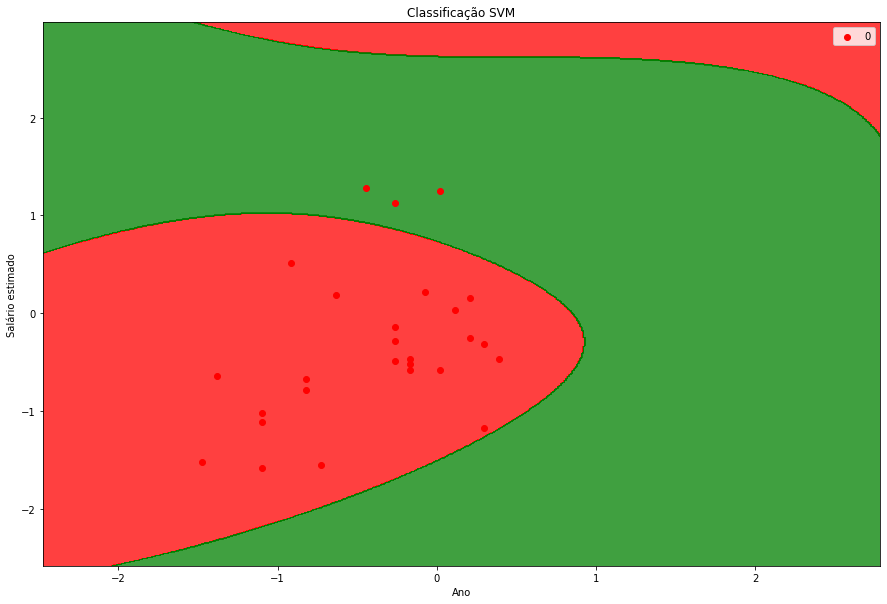

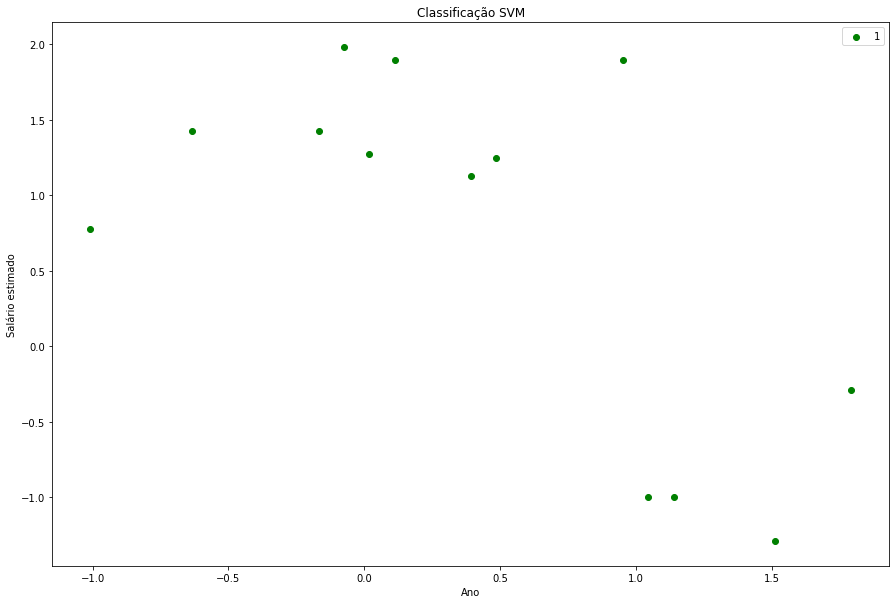

In [42]:
#Plotando o classificador que usa a função polinomial
visualizarSVM(compras_teste, classes_teste, SVM_polinomial)

In [43]:
#Vamos treinar o modelo para gerar o classificador usando a função kernel polinomial.
SVM_sigmoidal = SVC(kernel='sigmoid', gamma='scale', C=0.2, coef0=2)
SVM_sigmoidal.fit(compras_treino,classes_treino)

predicao_sigmoidal = SVM_sigmoidal.predict(compras_teste)
acuracia_sigmoidal = accuracy_score(classes_teste,predicao_sigmoidal)
print('Acurácia de classificação: {}'.format(round(acuracia_sigmoidal,3)*100)+'%')

Acurácia de classificação: 65.0%


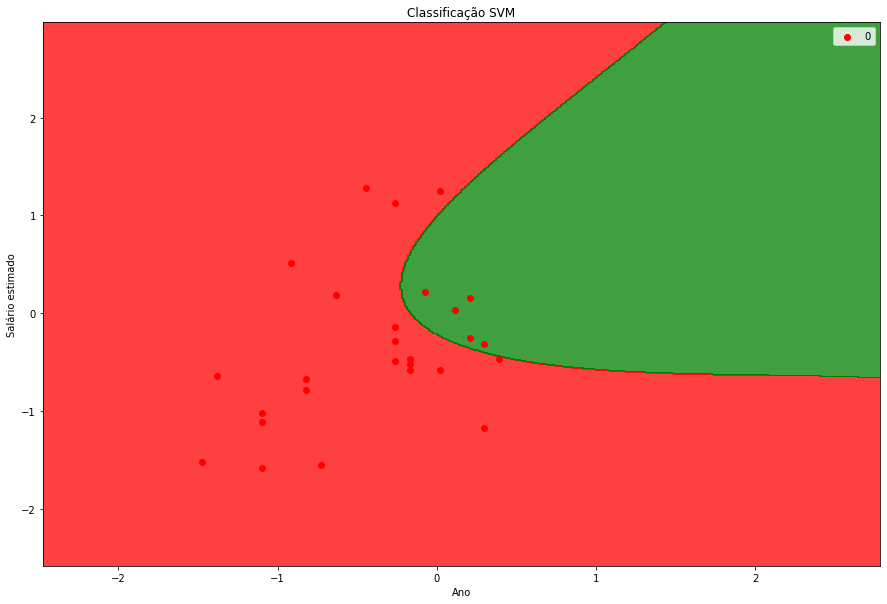

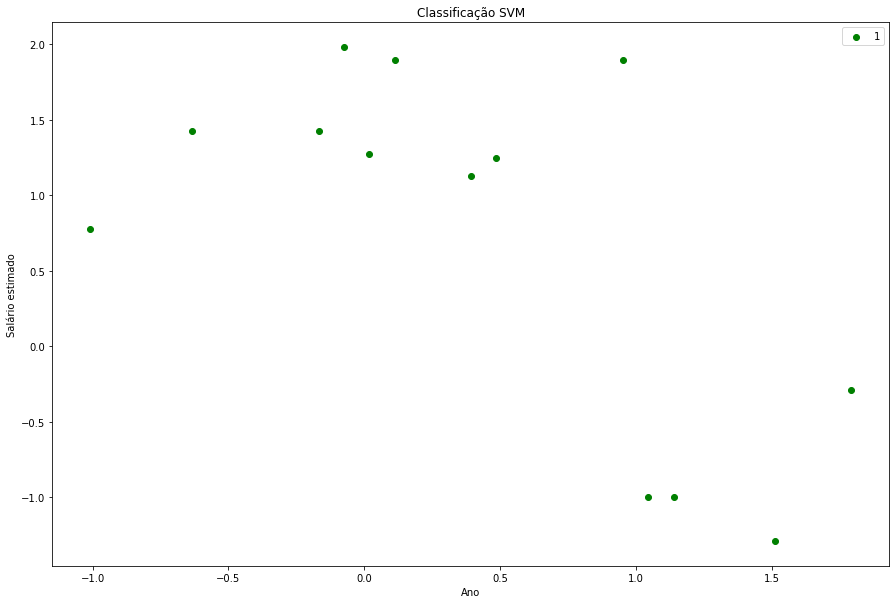

In [44]:
#Plotando o classificador que usa a função Kernel polinomial
visualizarSVM(compras_teste, classes_teste, SVM_sigmoidal)

**Conclusão**

_Os resultados mostram que os classificadores gerados conseguem classificar bem o
perfil de idade e renda que compra ou não por meio de anúncios nas redes sociais,
principalmente o que usa a função kernel polinomial._